In [58]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("..\data\2017.csv")
df.head()

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,Western Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


d:\coursera\python\task1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


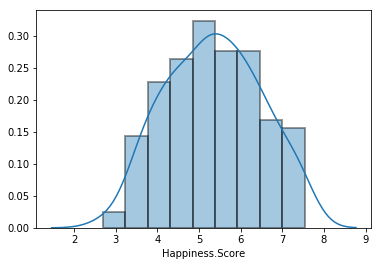

In [25]:
ax = sns.distplot(df['Happiness.Score'], hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

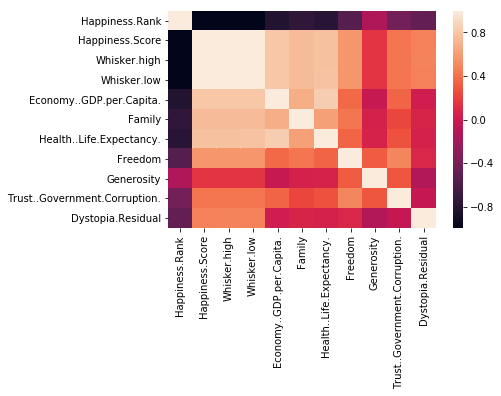

In [27]:
corrmat = df.corr()
sns.heatmap(corrmat)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

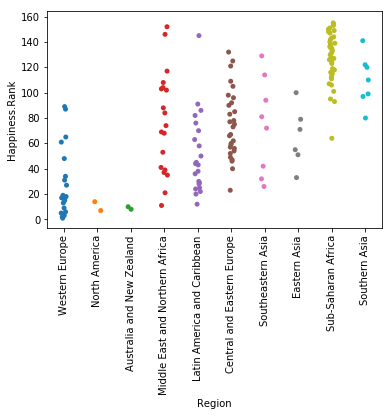

In [36]:
g = sns.stripplot(x="Region", y="Happiness.Rank", data=df, jitter=True)
plt.xticks(rotation=90)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['Happiness.Score']
X = df.drop(['Happiness.Score', 'Happiness.Rank', 'Country', 'Region'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Predicted Y')

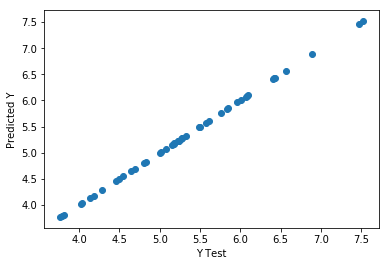

In [52]:
predicts = lm.predict( X_test)
plt.scatter(y_test,predicts)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [55]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predicts))
print('MSE:', metrics.mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts)))

MAE: 3.335393427171747e-15
MSE: 1.5580002878114983e-29
RMSE: 3.9471512357794175e-15


In [56]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Whisker.high,5.000000e-01
Whisker.low,5.000000e-01
Economy..GDP.per.Capita.,-4.424239e-13
Family,-4.395234e-13
Health..Life.Expectancy.,-4.359291e-13
Freedom,-4.426945e-13
Generosity,-4.357825e-13
Trust..Government.Corruption.,-4.400091e-13
Dystopia.Residual,-4.405365e-13
